# Sentiment Analysis by Subtheme per Agreement level

In [2]:
# Change working directory to be project root
import os
#os.chdir("..")
os.getcwd()

'C:\\Users\\payla\\Documents\\MDS\\Capstone\\DSCI_591_capstone-BCStats'

In [4]:
import pandas as pd
import numpy as np

import spacy
from spacy.matcher import Matcher  
# Load English model for SpaCy
nlp = spacy.load('en_core_web_sm')


from src.emotion_analysis import create_emotion_matcher
from src.emotion_analysis import emotion_strength
#from src.emotion_analysis import plot_data


from src.data.preprocessing_text import to_lowercase

In [200]:
%load_ext autoreload
%autoreload 2
#import importlib
#from src.emotion_analysis import plot_data
import src
#importlib.reload(src)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data and Lexicon

In [389]:
# read in data
df = pd.read_csv(".\data\interim\joined_qual_quant.csv")
df.head(3)

,USERID,code,qual_value,quan_value,question,diff,text
0,175125-215928,43,-1,-1,Q63,0,The problem with the BCSS is Linda Cavanaugh a...
1,175125-215928,43,-1,-1,Q65,0,The problem with the BCSS is Linda Cavanaugh a...
2,191202-862188,102,-1,-1,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS"


In [390]:
# Lexicon from "http://saifmohammad.com/WebDocs/NRC-AffectIntensity-Lexicon.txt"
lexicon = pd.read_csv("http://saifmohammad.com/WebDocs/NRC-AffectIntensity-Lexicon.txt", sep="\t", skiprows=35) 

# create dataframes for each emotions 
anger = lexicon[lexicon['AffectDimension']=='anger']
fear = lexicon[lexicon['AffectDimension']=='fear']
sad = lexicon[lexicon['AffectDimension']=='sadness']
joy = lexicon[lexicon['AffectDimension']=='joy']

## Create Rules for Matcher

In [391]:
match_anger = create_emotion_matcher(anger)
match_fear = create_emotion_matcher(fear)
match_sad = create_emotion_matcher(sad)
match_joy = create_emotion_matcher(joy)

## Create Dataframe for Each Subtheme and Agreement Level

In [426]:
# remove any duplicated comments
# DON"T do this, remove this line next time because messing up counts
#data = df.drop_duplicates(subset=["USERID"])

# convert text to lower case
df["clean_text"] = df['text'].apply(to_lowercase)
df.head(5)

,USERID,code,qual_value,quan_value,question,diff,text,anger,fear,sad,joy,encode,clean_text
0,175125-215928,43,-1,-1,Q63,0,The problem with the BCSS is Linda Cavanaugh a...,1.851,2.478,2.578,0.790,sad,the problem with the bcss is linda cavanaugh a...
1,175125-215928,43,-1,-1,Q65,0,The problem with the BCSS is Linda Cavanaugh a...,1.851,2.478,2.578,0.790,sad,the problem with the bcss is linda cavanaugh a...
2,191202-862188,102,-1,-1,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS",0.000,0.000,0.000,0.000,anger,"improved office space (fix hvac, etc) but no lws"
3,173110-932228,14,-1,0,Q46,1,Administration people should have better oppor...,0.000,0.000,0.000,0.375,joy,administration people should have better oppor...
4,185914-180608,24,-1,-1,Q20,0,We are the lowest paid in Canada with a worklo...,0.000,0.000,1.194,0.328,sad,we are the lowest paid in canada with a worklo...


In [17]:
comments = df["clean_text"]
# create SpaCy tokens
docs = [nlp(comment) for comment in comments]

In [384]:
# add the emotion scores to data
df["anger"] = emotion_strength(docs, match_anger, anger)
df["fear"] = emotion_strength(docs, match_fear, fear)
df["sad"] = emotion_strength(docs, match_sad, sad)
df["joy"] = emotion_strength(docs, match_joy, joy)

display(df.head(5))

,USERID,code,qual_value,quan_value,question,diff,text,clean_text,anger,fear,sad,joy,encode
0,175125-215928,43,-1,-1,Q63,0,The problem with the BCSS is Linda Cavanaugh a...,the problem with the bcss is linda cavanaugh a...,1.851,2.478,2.578,0.790,sad
1,175125-215928,43,-1,-1,Q65,0,The problem with the BCSS is Linda Cavanaugh a...,the problem with the bcss is linda cavanaugh a...,1.851,2.478,2.578,0.790,sad
2,191202-862188,102,-1,-1,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS","improved office space (fix hvac, etc) but no lws",0.000,0.000,0.000,0.000,anger
3,173110-932228,14,-1,0,Q46,1,Administration people should have better oppor...,administration people should have better oppor...,0.000,0.000,0.000,0.375,joy
4,185914-180608,24,-1,-1,Q20,0,We are the lowest paid in Canada with a worklo...,we are the lowest paid in canada with a worklo...,0.000,0.000,1.194,0.328,sad


In [392]:
df.head()

,USERID,code,qual_value,quan_value,question,diff,text
0,175125-215928,43,-1,-1,Q63,0,The problem with the BCSS is Linda Cavanaugh a...
1,175125-215928,43,-1,-1,Q65,0,The problem with the BCSS is Linda Cavanaugh a...
2,191202-862188,102,-1,-1,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS"
3,173110-932228,14,-1,0,Q46,1,Administration people should have better oppor...
4,185914-180608,24,-1,-1,Q20,0,We are the lowest paid in Canada with a worklo...


In [395]:
df["anger"] = emotion_strength(docs, match_anger, anger)

df.head()

,USERID,code,qual_value,quan_value,question,diff,text,anger
0,175125-215928,43,-1,-1,Q63,0,The problem with the BCSS is Linda Cavanaugh a...,1.851
1,175125-215928,43,-1,-1,Q65,0,The problem with the BCSS is Linda Cavanaugh a...,1.851
2,191202-862188,102,-1,-1,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS",0.000
3,173110-932228,14,-1,0,Q46,1,Administration people should have better oppor...,0.000
4,185914-180608,24,-1,-1,Q20,0,We are the lowest paid in Canada with a worklo...,0.000


In [397]:
df["fear"] = emotion_strength(docs, match_fear, fear)
df["sad"] = emotion_strength(docs, match_sad, sad)
df["joy"] = emotion_strength(docs, match_joy, joy)

### View plots

C:\Users\payla\Documents\MDS\Capstone\DSCI_591_capstone-BCStats\src\emotion_analysis.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data = [((data['anger']!=0)|(data['fear']!=0)|(data['joy']!=0)|(data['sad']!=0))]


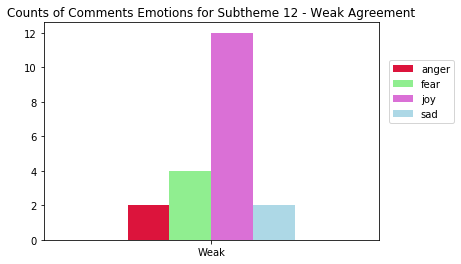

In [422]:
src.emotion_analysis.plot_data(12, "weak", df)

C:\Users\payla\Documents\MDS\Capstone\DSCI_591_capstone-BCStats\src\emotion_analysis.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['encode'] = data[["anger", "fear", "sad", "joy"]].idxmax(1).tolist()
C:\Users\payla\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


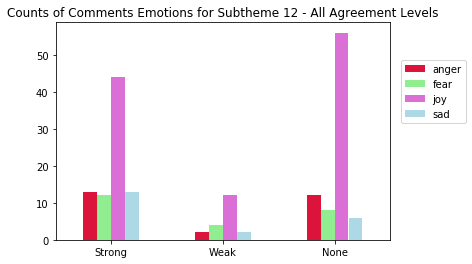

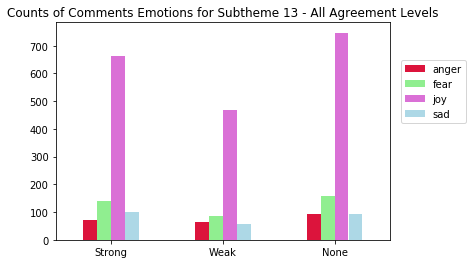

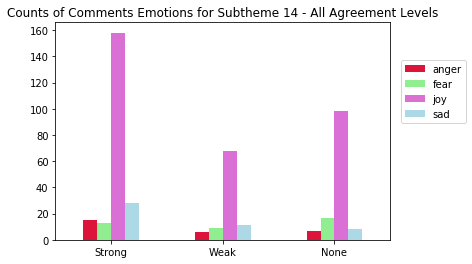

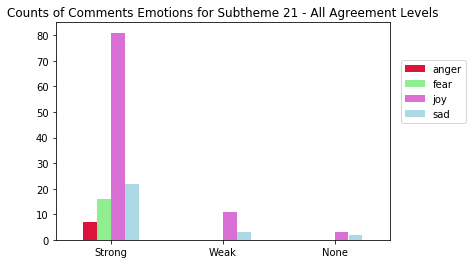

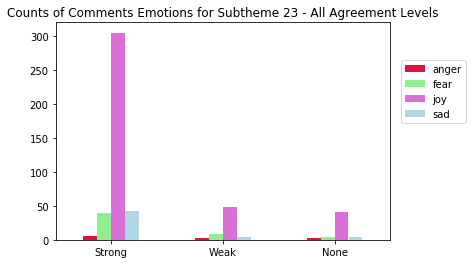

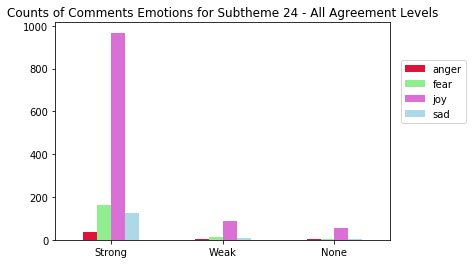

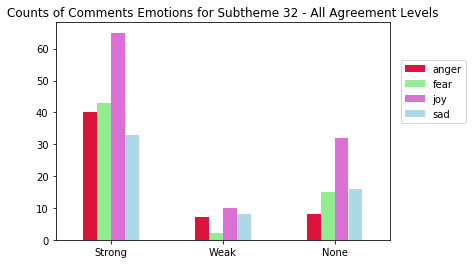

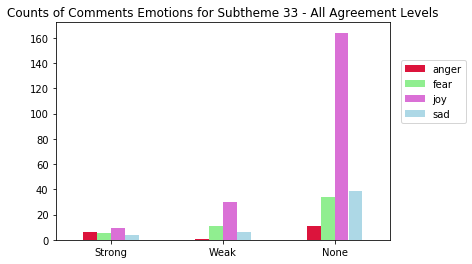

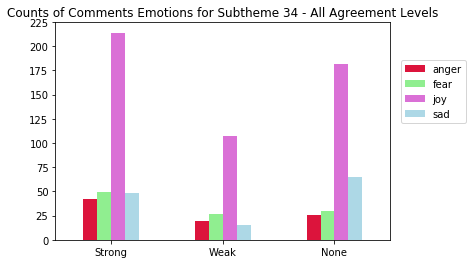

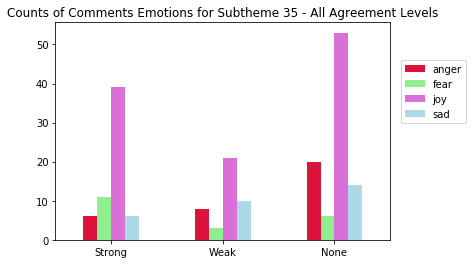

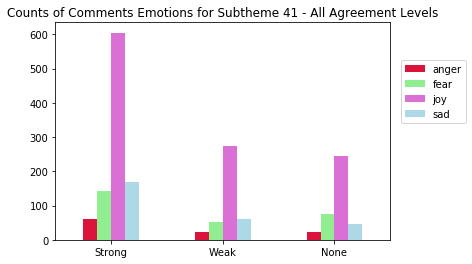

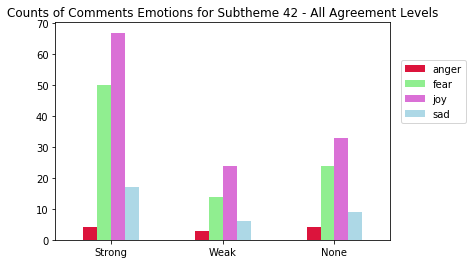

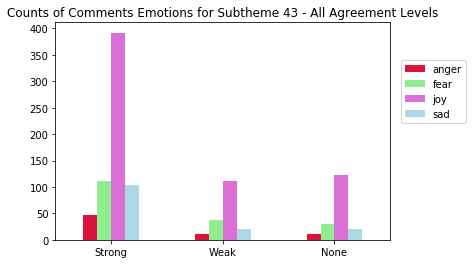

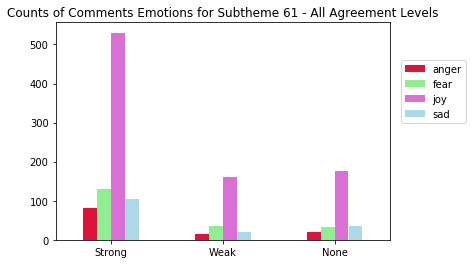

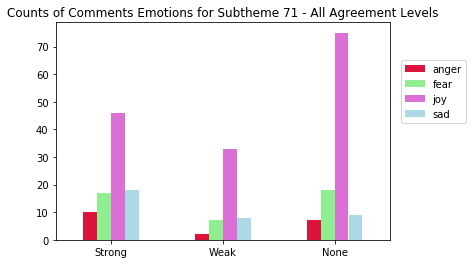

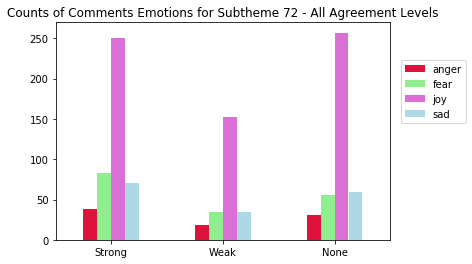

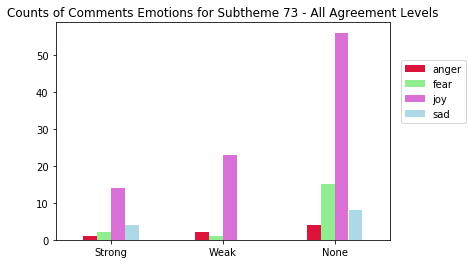

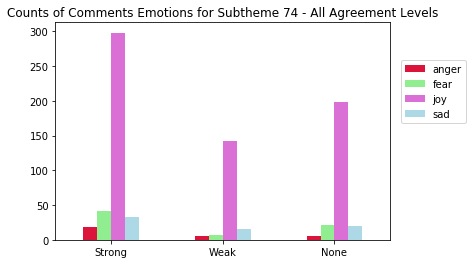

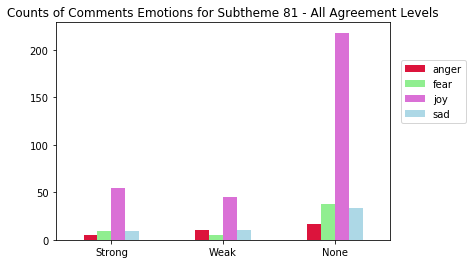

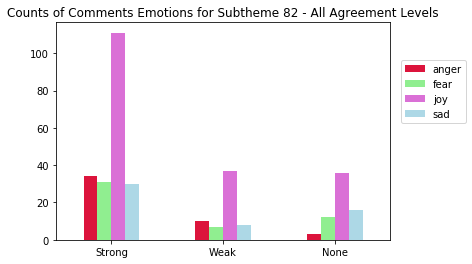

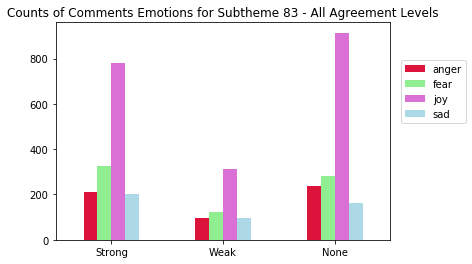

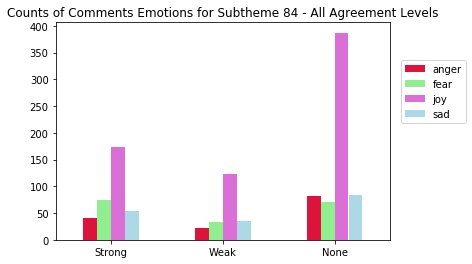

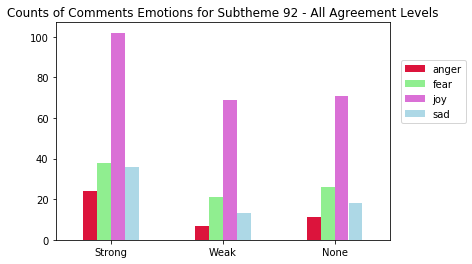

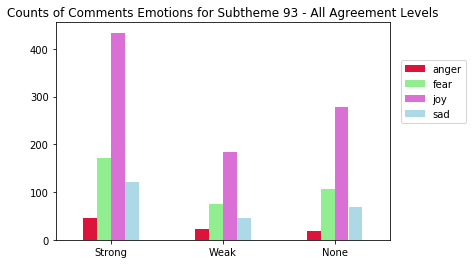

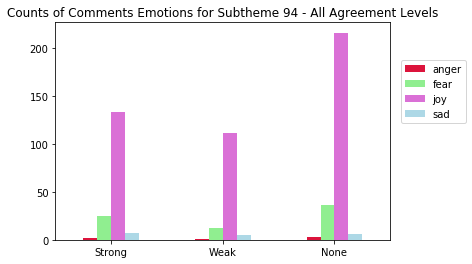

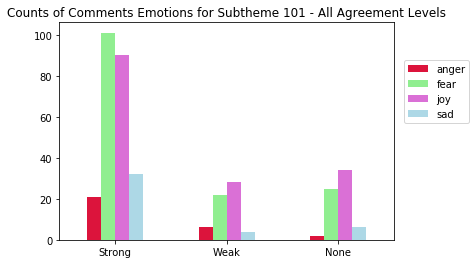

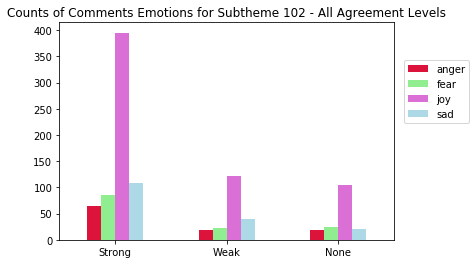

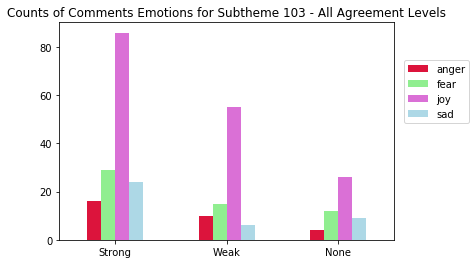

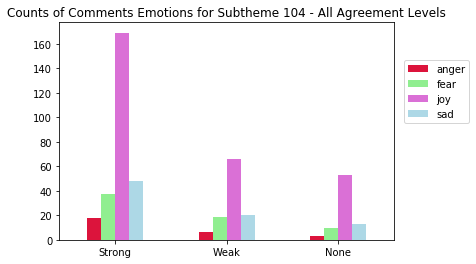

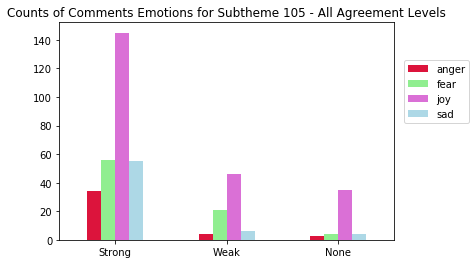

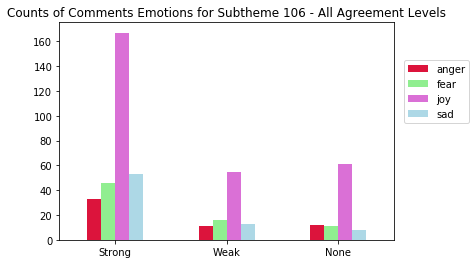

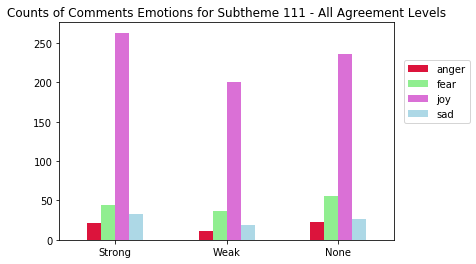

In [424]:
codes = np.sort(df['code'].unique())

for i in codes:
    plot_data(i, "all", df)

### Observations from subtheme level analysis

- joy is the most common emotion for all subthemes and agreement levels 
  - this seems to be due to the only words in the comment being happy
      - might be worth aggregating all of the sentences together and then doing the comparison
  - the other main reseson is the words are just with a negative context and since this is only matching words it doesn't understand the meaning
      - might be worth removing joy all together because it doesn't really match well
      
- a good set of the comments match to the emotion
    - Could manually score a small set of them to get an "accuracy" score
    - bit of weirdness due to context, government is one of the words in the lexicon and it is being used as a name compared to an emotion. Same with words like leave since it relates to time off not leaving often

- there are over 5000 comments that have no related emotion

- this seems counterintuitive
- subtheme 35, 82, 105
  - anger as dominant as joy in no agreement 
  - not since I made the adjustment to remove the emotionless comments
- subtheme 42, 101
  - fear is dominant as fear in strong agreement 
  

In [436]:
src.emotion_analysis.examine_emotion_scoring(df, "anger", lexicon)

,USERID,code,diff,clean_text,anger,fear,sad,joy,c_anger,c_fear,c_sad,c_joy
4506,193334-883144,61,0,in my opinion i believe a more fair job system...,0.422,0.0,0.203,0.172,1,0,0,0



Comment 
 in my opinion i believe a more fair job system should be put in place.  clearly is isn't equal and positions are not given on a merit basis.  i feel some jobs are misrepresented by a vague job description.  this can mean a lower tier position can be put up to more responsibilities and duties without proper compensation.  in the bc public service there isn't a rightful way to protest a description.  if an employee has a differing opinion or belief many times the only option is to find new employment.


ANGER
-----
misrepresented 0.422


FEAR
----


SAD
---
lower 0.203


JOY
---
service 0.172


In [382]:
# total number of comments is higher because there are duplicates 
# since comments relate to multiple mc questions
src.emotion_analysis.summary_number_comment(df, 0.3, include=True)
src.emotion_analysis.summary_number_comment(df, 0.5)
src.emotion_analysis.summary_number_comment(df, 1)
src.emotion_analysis.summary_number_comment(df, 2)
src.emotion_analysis.summary_number_comment(df, 5)

Total Number of Comments 31299
Remaining comments when all 4 emotions are zero 26041
Where joy is the only emotion with a score 6023
Number of comments 1553 with only joy and a sum score less than 0.3
Number of comments 2869 with only joy and a sum score less than 0.5
Number of comments 4857 with only joy and a sum score less than 1
Number of comments 5830 with only joy and a sum score less than 2
Number of comments 6023 with only joy and a sum score less than 5


# Make a function that plots at the main theme level and subtheme level
- 2 functions
- 1st one -- give main theme and levels of agreement and generates 1 to 3 plots 
    - still need to do
- go through and double check doc strings, examples & parameters have been changed
    - change df to data or something better  